# Work Absenteeism
***+ Tableau Dashboard***

Mitko Stoychev Dimitrov

17/06/2024 

This notebook is one of my first Data Science projects. Since this notebook is intended to be my work **portfolio** to simulate a real work environment, I will focus this project on business. 

In the business environment, Data Science projects usually have **3 components** or phases:
1. Business Analytics
2. Machine Learning
3. Deployment

# 1. Business Analytics
The **goal** of this phase is to find the **insigths** among the data, i.e. we have to separate the noise from the signal.

The Business Analytics stage is composed of 3 main phases: 
1. Data quality analysis → In a business environment there are always errors in the data. Apply data science techniques to eliminate such errors.
2. Exploratory data analisis of variables (EDA) → First Categoric Data and then Numeric Data
3. Analysis and generation of insights → seed questions

## 1.1. Load the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

# Prerocessing the data
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Models
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Plot Tree
from sklearn.tree import plot_tree

## 1.2. Load the data

In [2]:
df = pd.read_csv('data/AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


## 1.3. Data quality

Data Quality Analysis phase, ensuring the integrity and usability of your data is crucial. Here are the typical steps to follow to check the data quality:

1. Check for Missing Values (Null Data)
    - Identify Missing Values: Use functions like isnull() or isna() in pandas to identify missing values.
    - Quantify Missing Values: Determine the percentage of missing values in each column to understand the extent of the issue.
    - Handle Missing Values: Decide on a strategy to handle missing values, such as: remove or impute missing data.
    
2. Check for Duplicate Data
    - Identify Duplicates: Use functions like duplicated() to find duplicate rows.
    - Remove Duplicates: Remove duplicates using drop_duplicates().
      
3. Check for Inconsistent Data
    - Consistency Checks: Ensure that categorical data values are consistent. For example, check for variations in the category names("USA" vs "U.S.A" vs "United States")
    - Standardization: Standardize categorical variables to a consistent format.
      
4. Check for Outliers
    - Identify Outliers: Use visualizations (box plots, scatter plots) and statistical methods (Z-score, IQR) to detect outliers.
    - Handle Outliers: Decide whether to remove, transform, or keep outliers based on their impact on the analysis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

### 1.3.1. Null Data

In [4]:
df.isna().sum().sort_values(ascending=False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Conclusions:
- The vast majority of the variables do not have nulls. This is good, however 6 of the features do.
- "anos_en_puesto, "conciliacion" a priori they are not the most decisive features in work absenteeism and have many null data → drop features
- "sexo", "educacion", "satisfaccion_trabajo", "implicacion" → fill data with after EDA

In [5]:
df.drop(columns=["anos_en_puesto", "conciliacion"], inplace=True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


3.2. Check for duplicates

### 1.3.2. Check for duplicates

In [6]:
df[df.duplicated() == True]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,


Conclusions:
- There are no duplicated rows in the dataset.

### 1.3.3. Check for inconsistent data

In [7]:
categorical_data = df.select_dtypes("O")
for col in categorical_data.columns:
    print(col)
    print(categorical_data[col].unique())
    print("*********************************************************")

abandono
['Yes' 'No']
*********************************************************
viajes
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
*********************************************************
departamento
['Sales' 'Research & Development' 'Human Resources']
*********************************************************
educacion
['Universitaria' 'Secundaria' 'Master' 'Primaria' nan]
*********************************************************
carrera
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
*********************************************************
satisfaccion_entorno
['Media' 'Alta' 'Muy_Alta' 'Baja']
*********************************************************
implicacion
['Alta' 'Media' 'Muy_Alta' 'Baja' nan]
*********************************************************
puesto
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Hu

Conclusions:
* It seems all the data is correct and there are not any inconsistency.
* Note: the variable mayor_edad is not a variable, is a constant.

### 1.3.4. Check for outliers


In [8]:
numeric_data = df.select_dtypes("number")

In [9]:
def outlier_detection(data, features):
    """
    Takes a dataframe and a list of the columns that is decided to apply Tukey´s method for detecting outliers.
    Returns a list of indices that are considered outliers.
    """
    outlier_indices = []
    n = 2 # treshold
    
    # Iterate over each feature
    for col in features:
        # Calculate quartiles
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1      
        
        # Determine the index of the outliers for feature col
        outlier_list_col = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)].index
        
        # Append indices of outliers for every col 
        outlier_indices.extend(outlier_list_col)
        
    # Count occurrences of each index
    outlier_count = Counter(outlier_indices)
    
    # Select indices with more than n outliers
    multiple_outliers = [index for index, count in outlier_count.items() if count > n]
    
    return multiple_outliers

In [10]:
outliers_to_drop = outlier_detection(numeric_data, numeric_data.columns)
outliers_to_drop

[58,
 80,
 140,
 162,
 253,
 254,
 259,
 264,
 319,
 329,
 352,
 374,
 386,
 429,
 444,
 549,
 569,
 638,
 644,
 731,
 776,
 809,
 825,
 905,
 997,
 1038,
 1069,
 1109,
 1204,
 1267,
 1282,
 1288,
 1307,
 1336,
 1408,
 1422,
 1472,
 1578,
 1602,
 1665,
 1719,
 1740,
 1770,
 1867,
 1892,
 1973,
 532,
 746,
 244,
 1375,
 165,
 851,
 1278,
 1373,
 1539,
 1606,
 1824,
 1225,
 1293,
 1523]

Conclusions:
* I have identified the outliers but for this moment, but for this moment I won't do anything with them.

## 1.4. EDA Categorical Data

In [11]:
def charts_eda_categorical(cat):
    
    #calculate the number of rows
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    #define the graph
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

    #We flatten to iterate through the graph as if it were 1-dimensional instead of 2-dimensional.
    ax = ax.flat 

    #We create the loop that adds graphics
    for every, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[every])
        ax[every].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[every].tick_params(labelsize = 12)

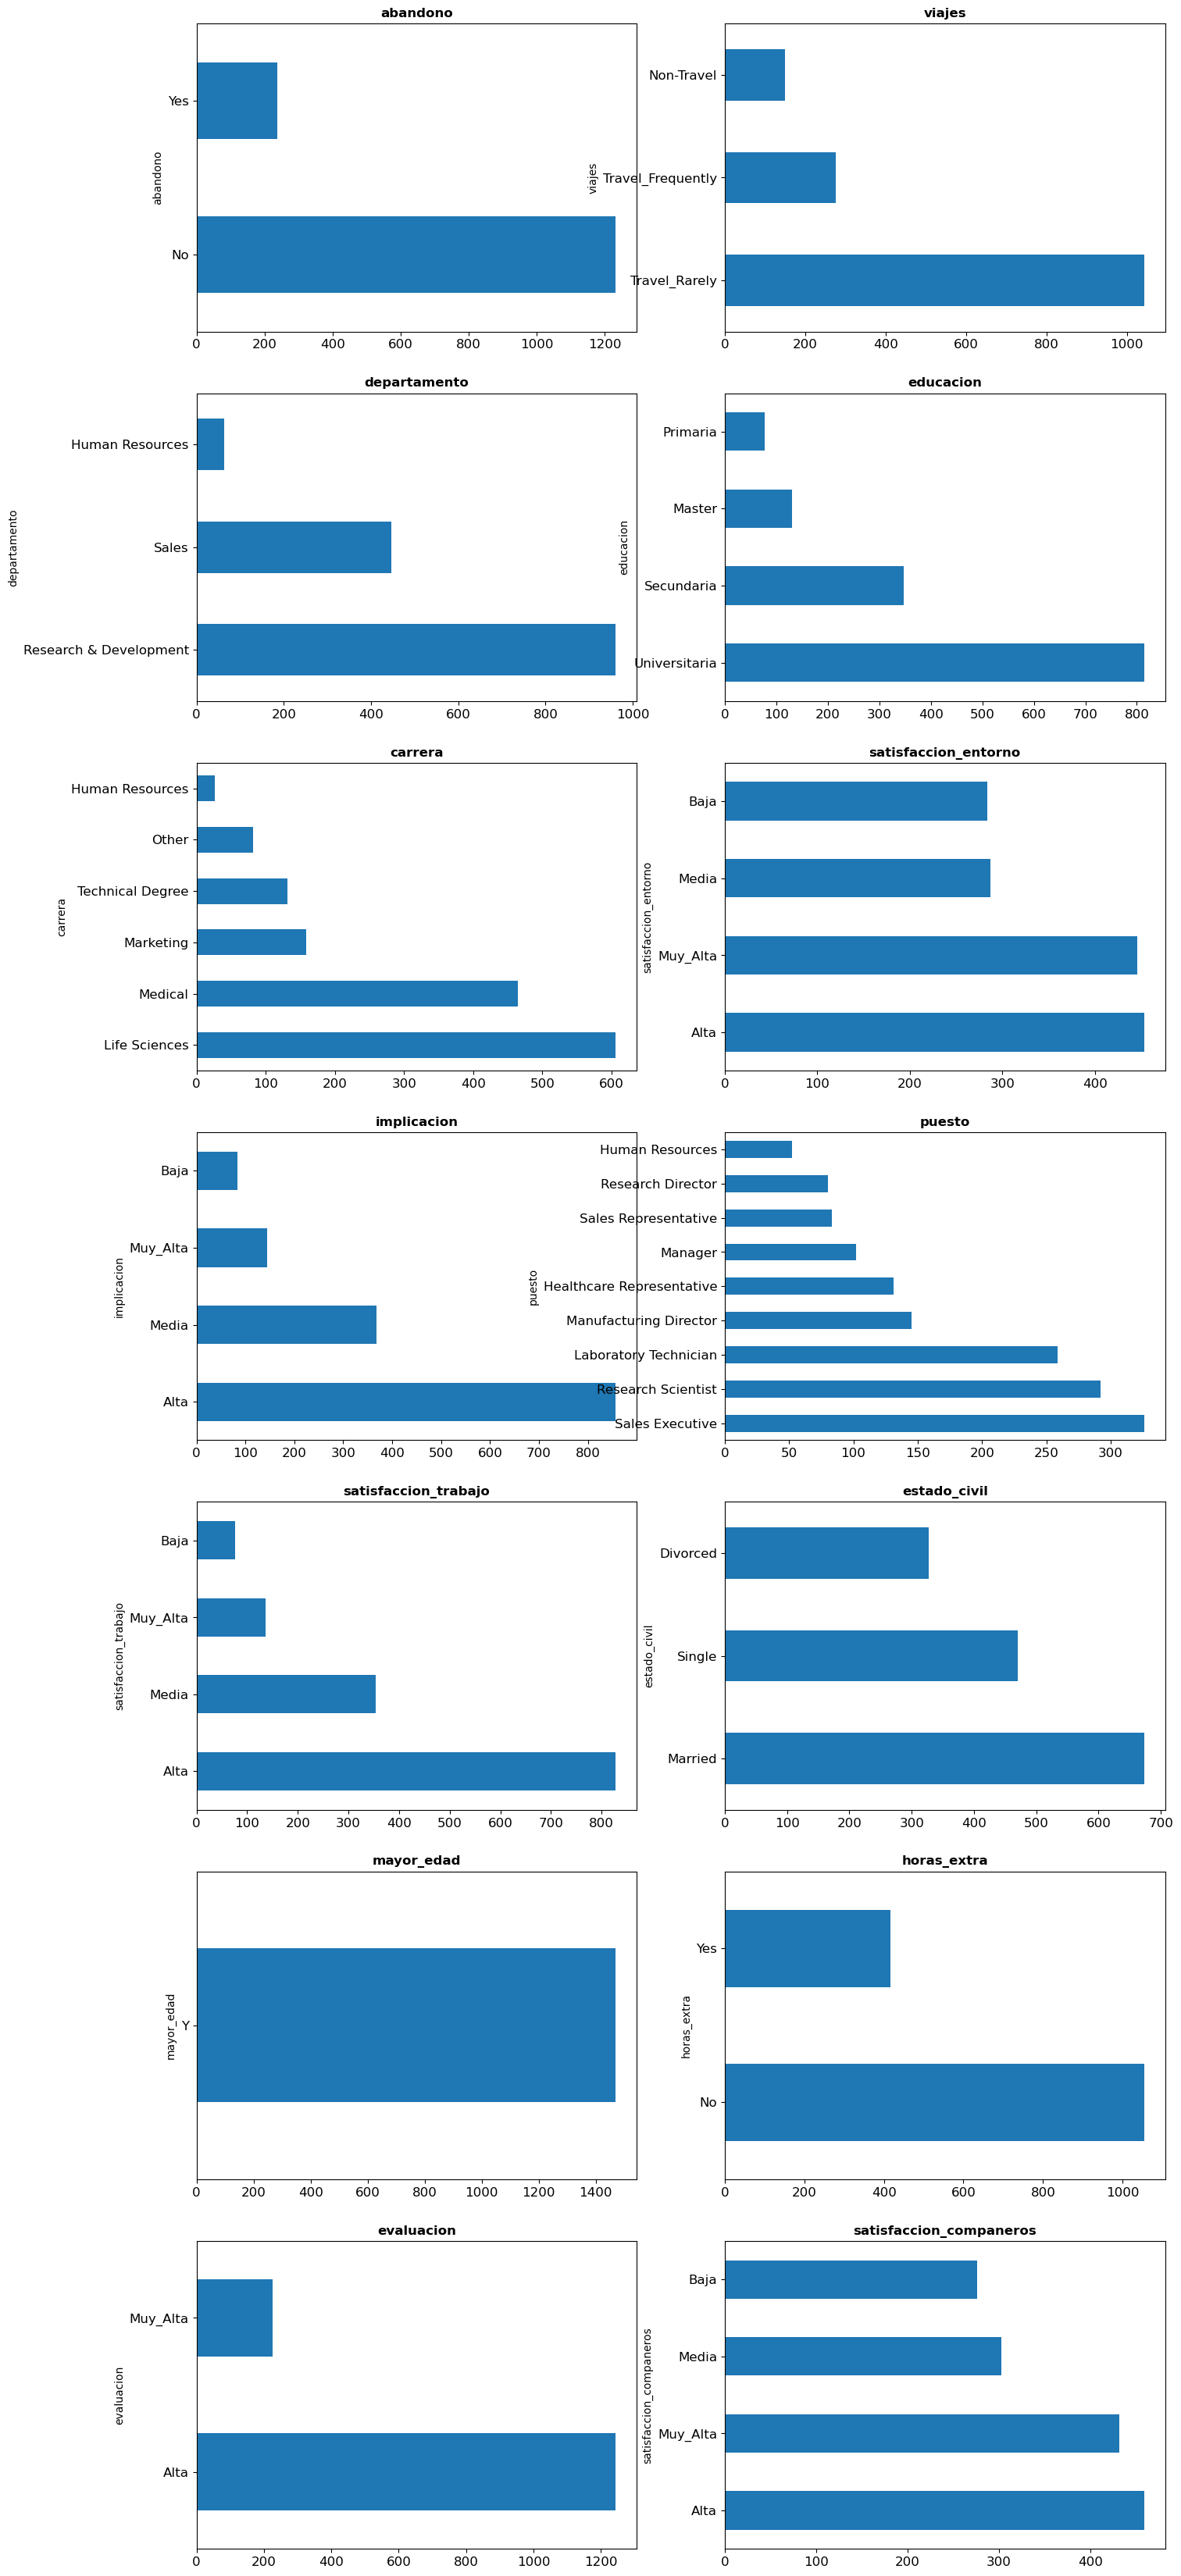

In [12]:
charts_eda_categorical(categorical_data)

Conclusions:
- "mayor_edad" has only one value → drop it
- On pending imputations of categorical variables:
  - "educacion": fill with 'Universitaria'
  - "satisfaccion_trabajo": fill with 'Alta'
  - "implicacion": fill with 'Alta'

In [13]:
df.drop(columns=["mayor_edad"], inplace=True)

df["educacion"].fillna(value="Universitaria", inplace=True)

df["satisfaccion_trabajo"].fillna(value="Alta", inplace=True)

df["implicacion"].fillna(value="Alta", inplace=True)

## 1.5. EDA Numerical Data

In [14]:
def statistics_cont(num):
    #use describe method transposed
    statistics = num.describe().T
    #Add the median
    statistics['median'] = num.median()
    # rearrange so that the median is next to the mean.
    statistics = statistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return(statistics)

In [15]:
statistics_cont(df.select_dtypes("number"))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusions:
- the variable "empleados" only has one value--> Therefore, it is not a variable it is a constant → remove it.
- the variable "sexo" has 4 values →  remove it
- the variable "horas_quincena" only has one value →  Therefore, it is not a variable it is a constant → remove it.
- About the numerical null there is only "sexo", but since we are going to eliminate it, there is no longer anything to fill.

In [16]:
df.drop(columns=["empleados", "sexo", "horas_quincena"], inplace=True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


In [17]:
df.isna().sum().sort_values(ascending=False)

edad                        0
salario_mes                 0
anos_desde_ult_promocion    0
anos_compania               0
num_formaciones_ult_ano     0
anos_experiencia            0
nivel_acciones              0
satisfaccion_companeros     0
evaluacion                  0
incremento_salario_porc     0
horas_extra                 0
num_empresas_anteriores     0
estado_civil                0
abandono                    0
satisfaccion_trabajo        0
puesto                      0
nivel_laboral               0
implicacion                 0
satisfaccion_entorno        0
carrera                     0
educacion                   0
distancia_casa              0
departamento                0
viajes                      0
anos_con_manager_actual     0
dtype: int64

## 1.6. INSIGHTS GENERATION

I will present my Business Analytics plan the following 3 steps:
- Step 1: Quantification of the problem
- Step 2: Economic impact
- Step 3: Savings scenarios

### Step 1: Quantification of the problem

#### Quantification of the problem: What is the absenteeism rate?

In [18]:
# counts
df.abandono.value_counts()

abandono
No     1233
Yes     237
Name: count, dtype: int64

In [19]:
# percentage
df.abandono.value_counts(normalize=True)*100

abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

#### Is there a typical profile of an employee who leaves the company?

In [20]:
# Transform "abandono" to numeric
df["abandono"] = df["abandono"].map({'No':0, 'Yes':1})

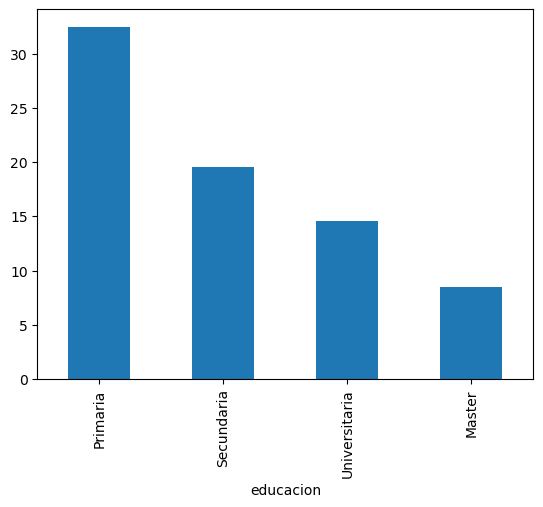

In [21]:
# Analysis by education
temp = df.groupby("educacion")["abandono"].mean().sort_values(ascending = False) * 100
temp.plot.bar();

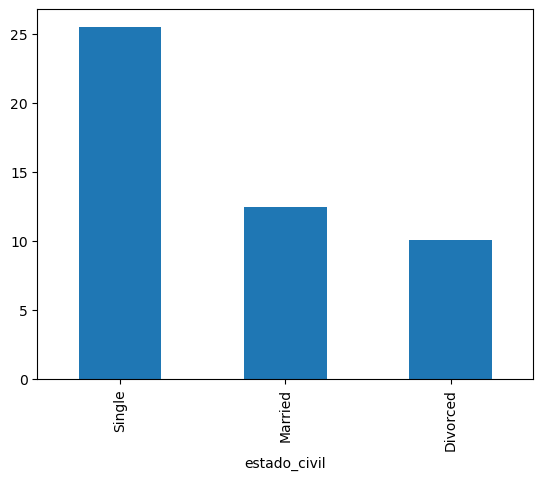

In [22]:
# Analysis by marital status
temp = df.groupby("estado_civil")["abandono"].mean().sort_values(ascending = False) * 100
temp.plot.bar();

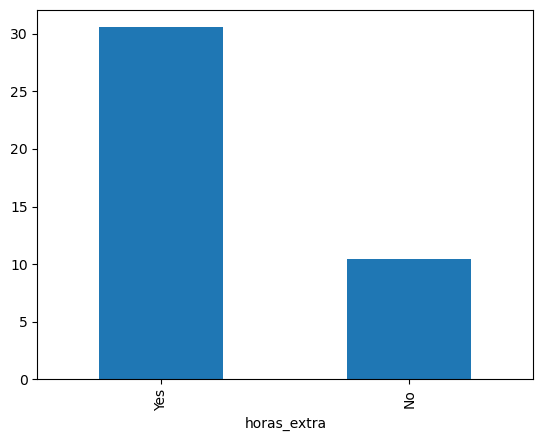

In [23]:
# Analysis by overtime hours
temp = df.groupby("horas_extra")["abandono"].mean().sort_values(ascending = False) * 100
temp.plot.bar();

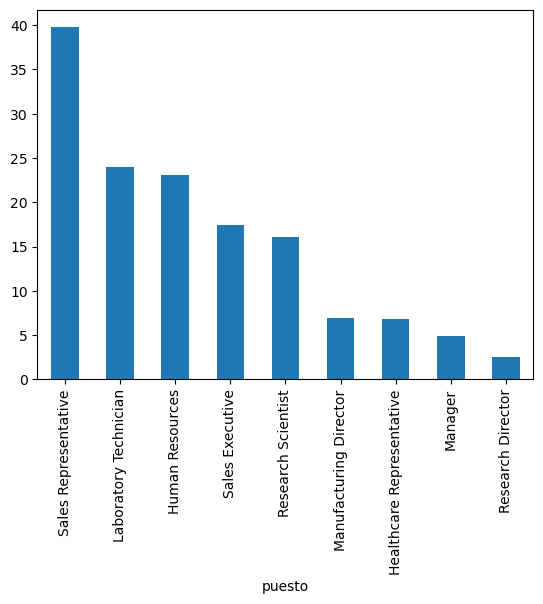

In [24]:
# Analysis by type of job
temp = df.groupby("puesto")["abandono"].mean().sort_values(ascending=False) * 100
temp.plot.bar();

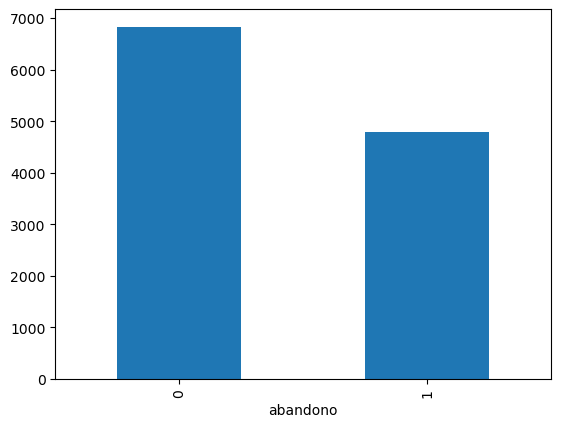

In [25]:
# Analysis by Job Abandonment
temp = df.groupby(["abandono"])["salario_mes"].mean()
temp.plot.bar();

Conclusions:

The average profile of the employee leaving the company is:
- Low educational level
- Single
- Works in sales
- Low salary + High overtime load

---
<br/><br/>

### Step 2: Economic impact

#### What is the economic impact of this problem?

According to the Center for American Progress' "Cost of Turnover" study:
- The cost of leakage for employees earning less than 30,000 is 16.1% of their salary.
- The cost of leakage for employees earning between 30,000-5,000,000 is 19.7% of their salary.
- The cost of the leakage of employees earning between 50,000-75,000 is 20.4% of their salary.
- The cost of the leakage of employees earning more than 75,000 is 21% of their salary.

https://www.americanprogress.org/wp-content/uploads/sites/2/2012/11/CostofTurnover.pdf

In [26]:
# Create new variable salario_ano of the employee
df["salario_ano"] = df["salario_mes"].apply(lambda x: x*12)
df[["salario_mes","salario_ano"]]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [27]:
# Calculate the economic impact of each employee leaving the company

# list of conditions
conditions = [(df["salario_ano"] <= 30000),
               (df["salario_ano"] > 30000) & (df["salario_ano"] <= 50000),
               (df["salario_ano"] > 50000) & (df["salario_ano"] <= 75000),
               (df["salario_ano"] > 75000)]

# List of results
results = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]
                
#apply select
df['impacto_abandono'] = np.select(conditions, results, default = -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


#### How much cost the problem of the job leakage in the last year?

In [28]:
total_cost = df[df["abandono"] == 1]["impacto_abandono"].sum()
total_cost

2719005.912

#### How much cost the low motivation of the empoyees? ("implicacion" == "Baja")

In [29]:
df[(df["abandono"] == 1) & (df["implicacion"] == "Baja")]["impacto_abandono"].sum()

368672.688

---
<br/><br/>

### Step 3: Savings scenarios

#### How much money could we save by improving employee loyalty?

I will propose 3 scenarios:
1. Reduce work leakage 10%  (Conservative scenario)
2. Reduce work leakage 20%
3. Reduce work leakage 30% (Optimistic scenario)

In [30]:
print(f"Reducing work leakage by 10% will save the company {int(total_cost * 0.1)} $ annually. (Conservative scenario)")

print(f"Reducing work leakage by 20% will save the company {int(total_cost * 0.2)} $ annually.")

print(f"Reducing work leakage by 30% will save the company {int(total_cost * 0.3)} $ annually. (Optimistic scenario)")

Reducing work leakage by 10% will save the company 271900 $ annually. (Conservative scenario)
Reducing work leakage by 20% will save the company 543801 $ annually.
Reducing work leakage by 30% will save the company 815701 $ annually. (Optimistic scenario)


---
<br/><br/>

#### And we can continue mapping strategies associated with abandonment insights:

We had seen that sales reps are the position that leaves the most. Would it make sense to make a specific plan for them? What would be the cost saved if we decrease the leakage by 30%?

First let's calculate the % of sales reps that have left in the past year.

In [31]:
# calculate total number of Sales Representative
total_sales = len(df[df["puesto"] == "Sales Representative"])

# Sales representative who have left the company
sales_left = len(df[(df["puesto"] == "Sales Representative") & (df["abandono"] == 1)]) 

#percentage
perc_left = sales_left / total_sales
print(f"{perc_left * 100}%")

39.75903614457831%


Now let's estimate how many "Sales Representative" will leave the company this year.

In [32]:
total_sales_actual = len(df[(df["puesto"] == "Sales Representative") & (df["abandono"] == 0)])
will_leave = int(total_sales_actual * perc_left)
will_leave

19

Of these, how many can be retained (hypothesis 20%) and how much money can be involved:

In [33]:
hold = int(will_leave * 0.3)

saving = df[(df["puesto"] == "Sales Representative") & (df["abandono"] == 0)]["impacto_abandono"].sum() * perc_left * 0.2

print(f"We could hold {hold} Sales Representative and this could result in savings of around {saving}$")

We could hold 5 Sales Representative and this could result in savings of around 24964.81616385542$


This data insight is also very interesting because it allows us to determine the budget for retention actions by department or profile.

We know that we can spend up to $25,000 just on specific actions to retain sales reps and they would be paying for themselves with the loss avoided.

---
<br><br>

# 2. Machine Learning

In [34]:
df_ml = df.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

### 2.1. Prepare data for modeling

Two mandatory requirements (scikit learn):
1. Nulls are not allowed
3. There cannot be variables in categorical format → transform to numerical data

Optional:
1. Scale the data
2. Normalize the variables
3. Data Engineering

#### Check for null data

In [35]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

#### Manage the categorical dataa

In [36]:
#Categorical data
cat = df_ml.select_dtypes("O")
cat_columns = cat.columns

#Inicialize
ohe = OneHotEncoder(sparse_output=False)

# Train and apply transformation
cat_ohe = ohe.fit_transform(cat)

#To dataframe and add columns
cat_ohe = pd.DataFrame(cat_ohe, columns=ohe.get_feature_names_out(cat_columns))
cat_ohe.head()

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


**Final Dataframe**

Categorical data has been expanded into columns and is now numerical. 

Select the numeric variables to be able to join them to the cat_hoe variables

In [37]:
num = df.select_dtypes('number').reset_index(drop = True)

In [38]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


## 2.2. Design of the modeling 

#### Separate predictor and target variables

In [39]:
X = df_ml.drop(columns="abandono")
y = df_ml["abandono"]

#### Separate train and test data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 2.3. Training the model over train

In [41]:
#Instanciar
dtc = DecisionTreeClassifier(max_depth=4)

#Entrenar
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

### 2.4. Predict over test and evaluate the model

In [42]:
# Predict
y_pred = dtc.predict(X_test)
pred = dtc.predict_proba(X_test)[:, 1]
print(y_pred)
print("****************************************************************************")
pred[:20]

[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0]
****************************************************************************


array([0.07692308, 0.25      , 0.04571429, 0.2       , 0.04571429,
       0.68421053, 0.04571429, 0.04571429, 0.04571429, 0.04571429,
       0.04571429, 0.65      , 0.07692308, 0.04571429, 0.04571429,
       0.08411215, 0.04571429, 0.04571429, 0.5       , 0.68421053])

In [43]:
# Evaluate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compute roc_auc metrics
roc_auc = roc_auc_score(y_test, pred)

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score:", f1)
print("Roc_auc", roc_auc)
print("Confusion Matrix:")
print(cnf_matrix)

Accuracy:  0.8321995464852607
Precision:  0.5098039215686274
Recall:  0.3466666666666667
F1-score: 0.41269841269841273
Roc_auc 0.7014207650273224
Confusion Matrix:
[[341  25]
 [ 49  26]]


### 2.5. Interpretation

#### Tree Diagram

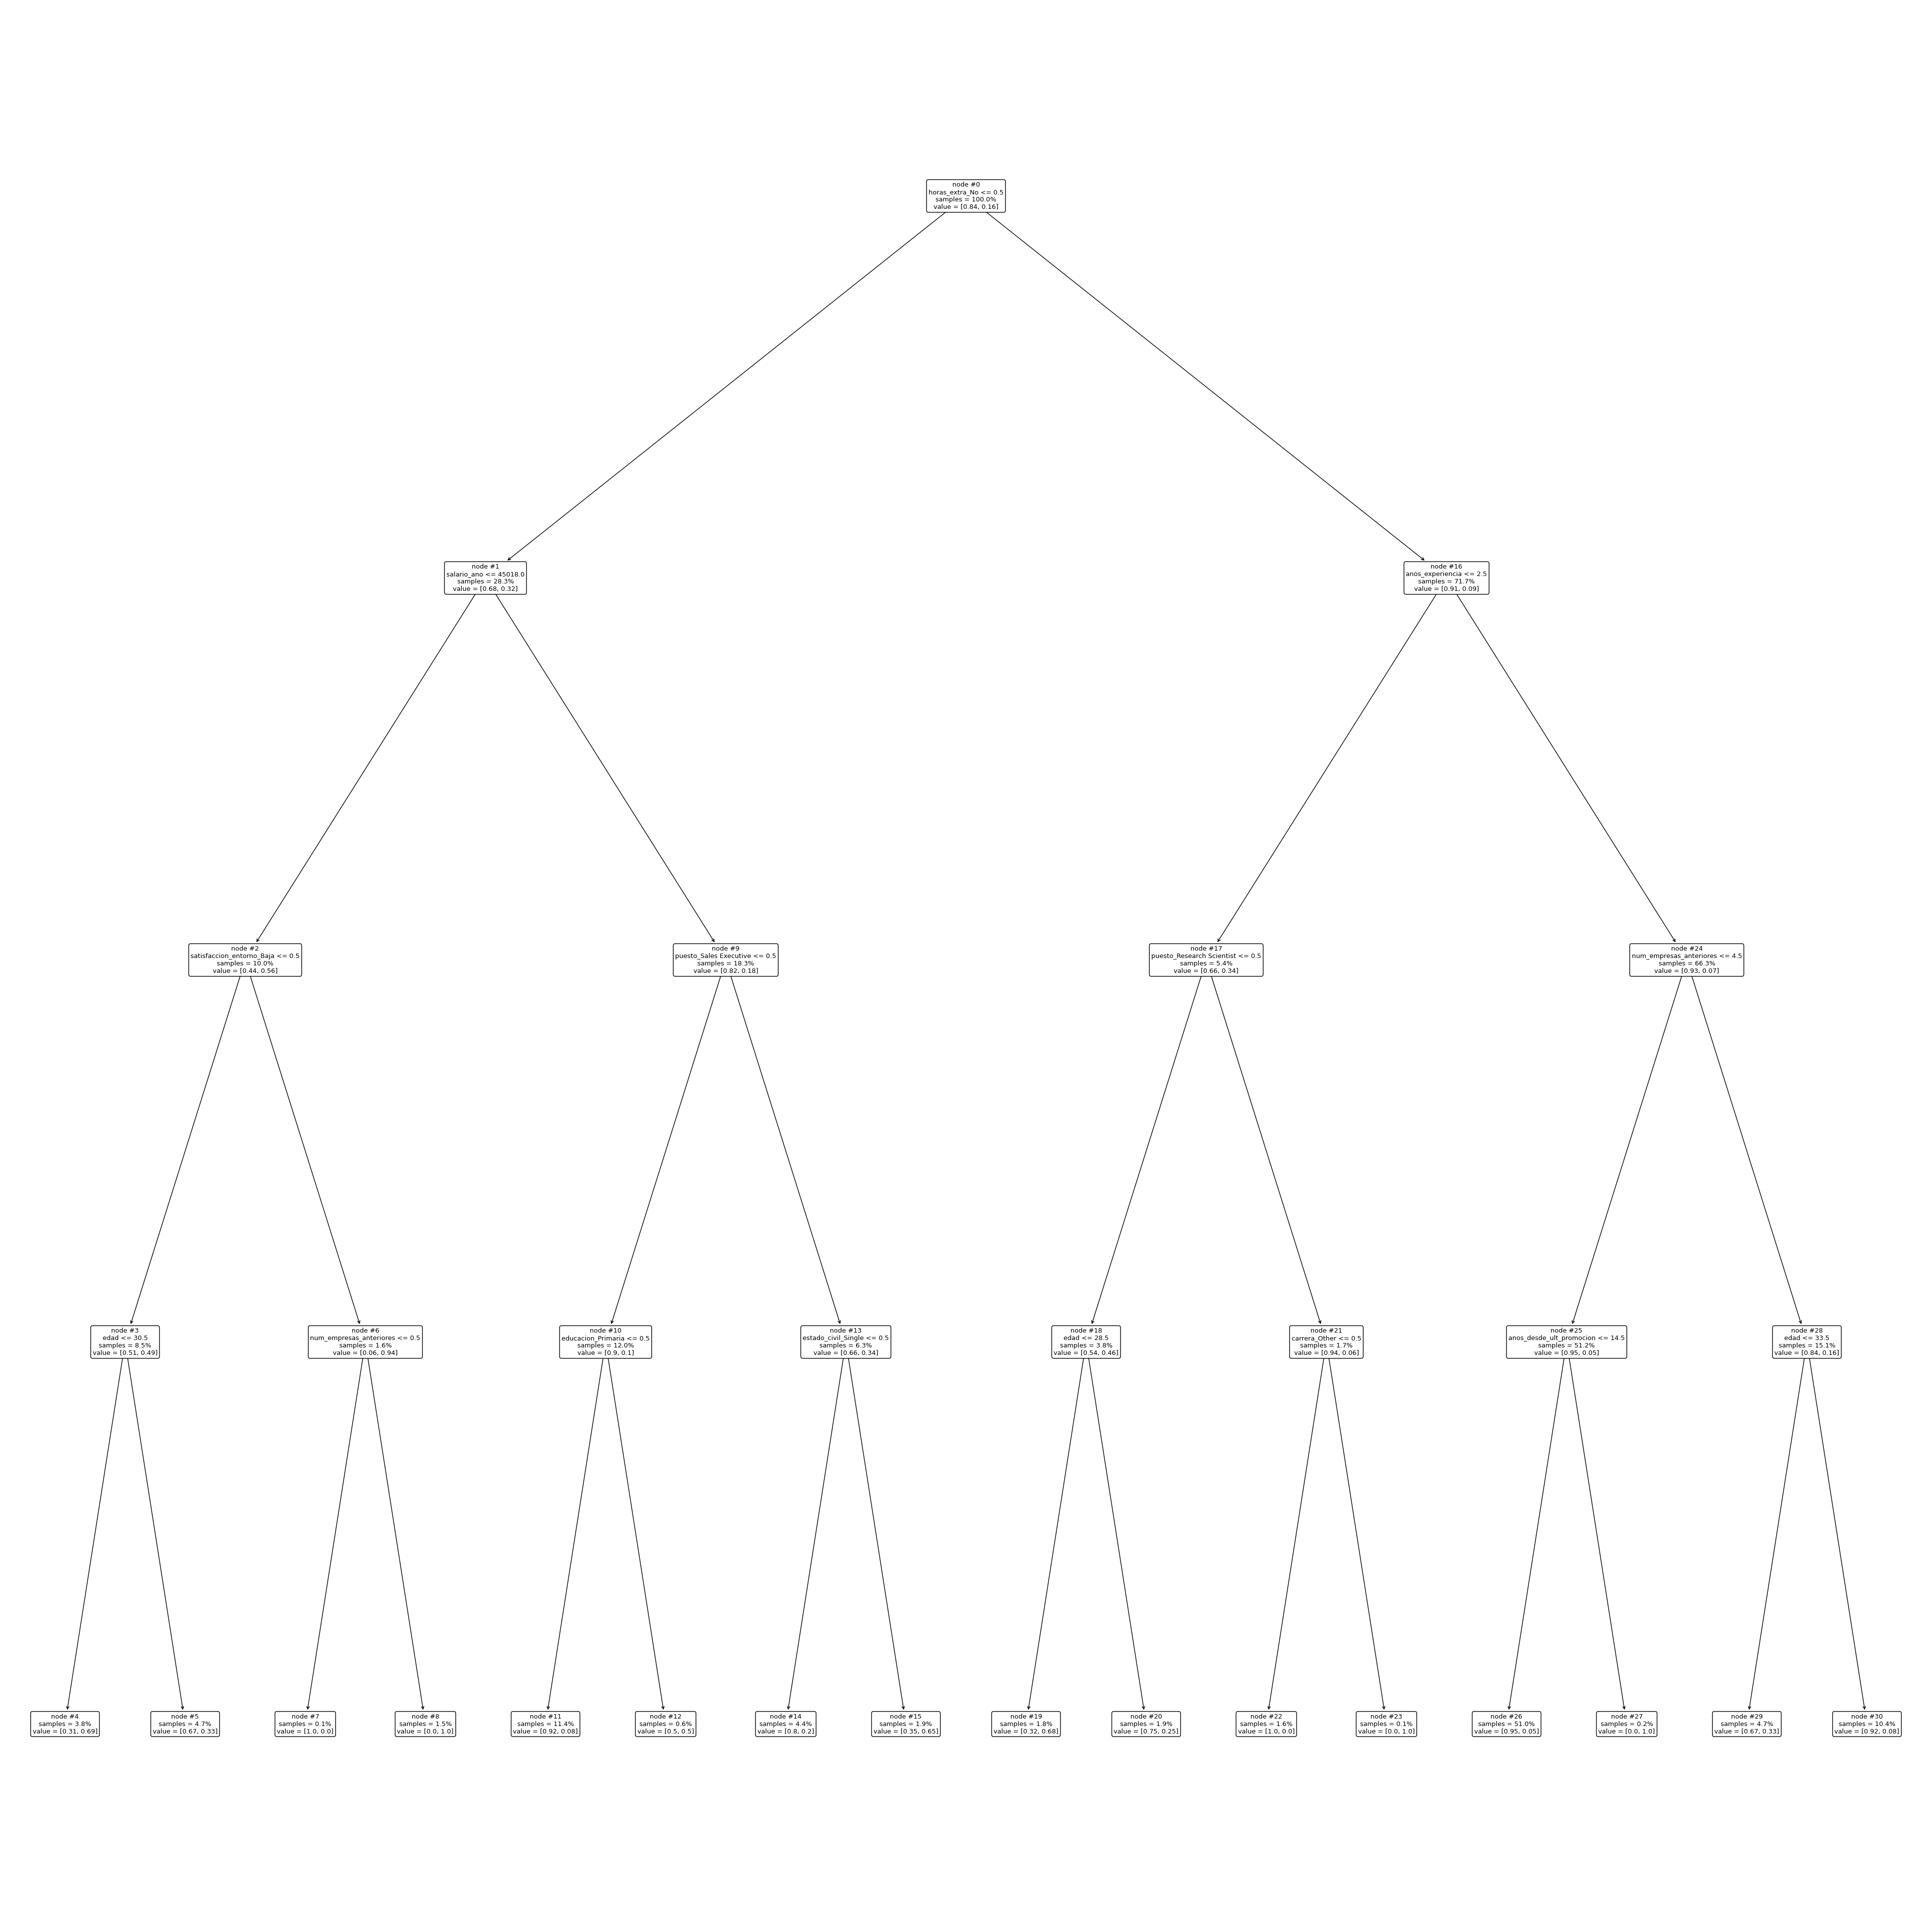

In [44]:
plt.figure(figsize = (50, 50))

plot_tree(dtc,
          feature_names= X_test.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

#### Importance of variables

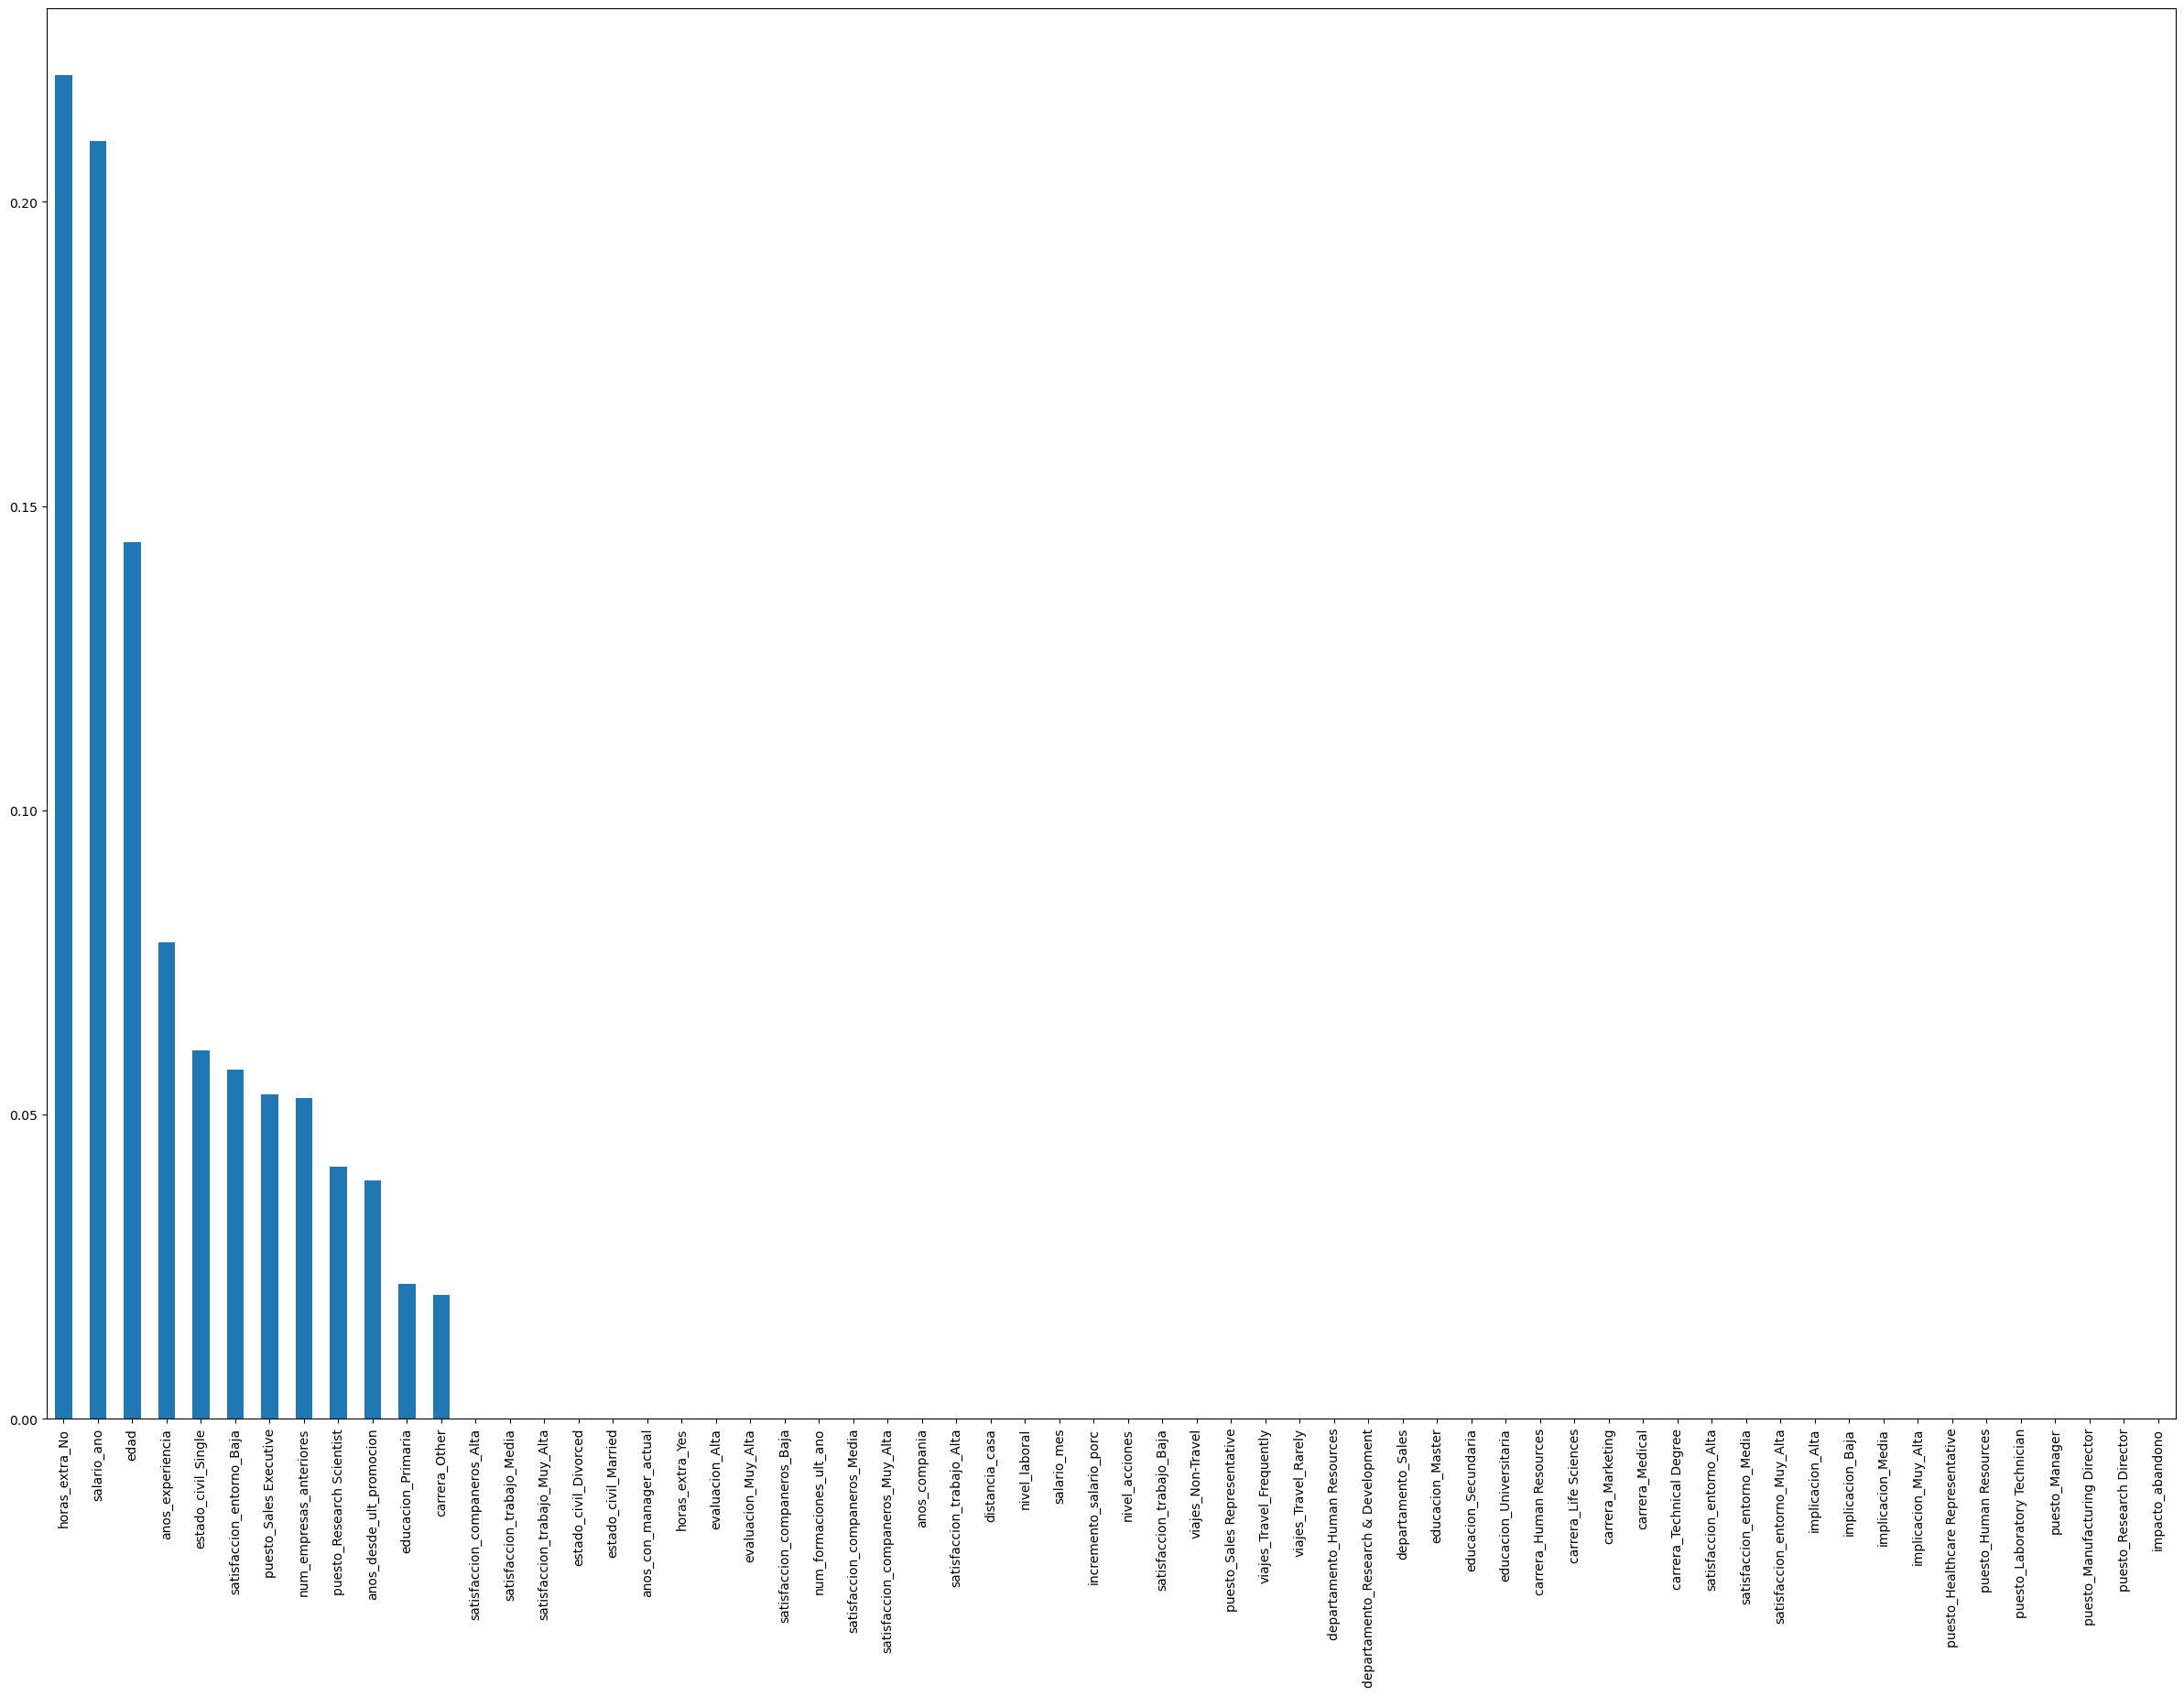

In [45]:
pd.Series(dtc.feature_importances_, index = X_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

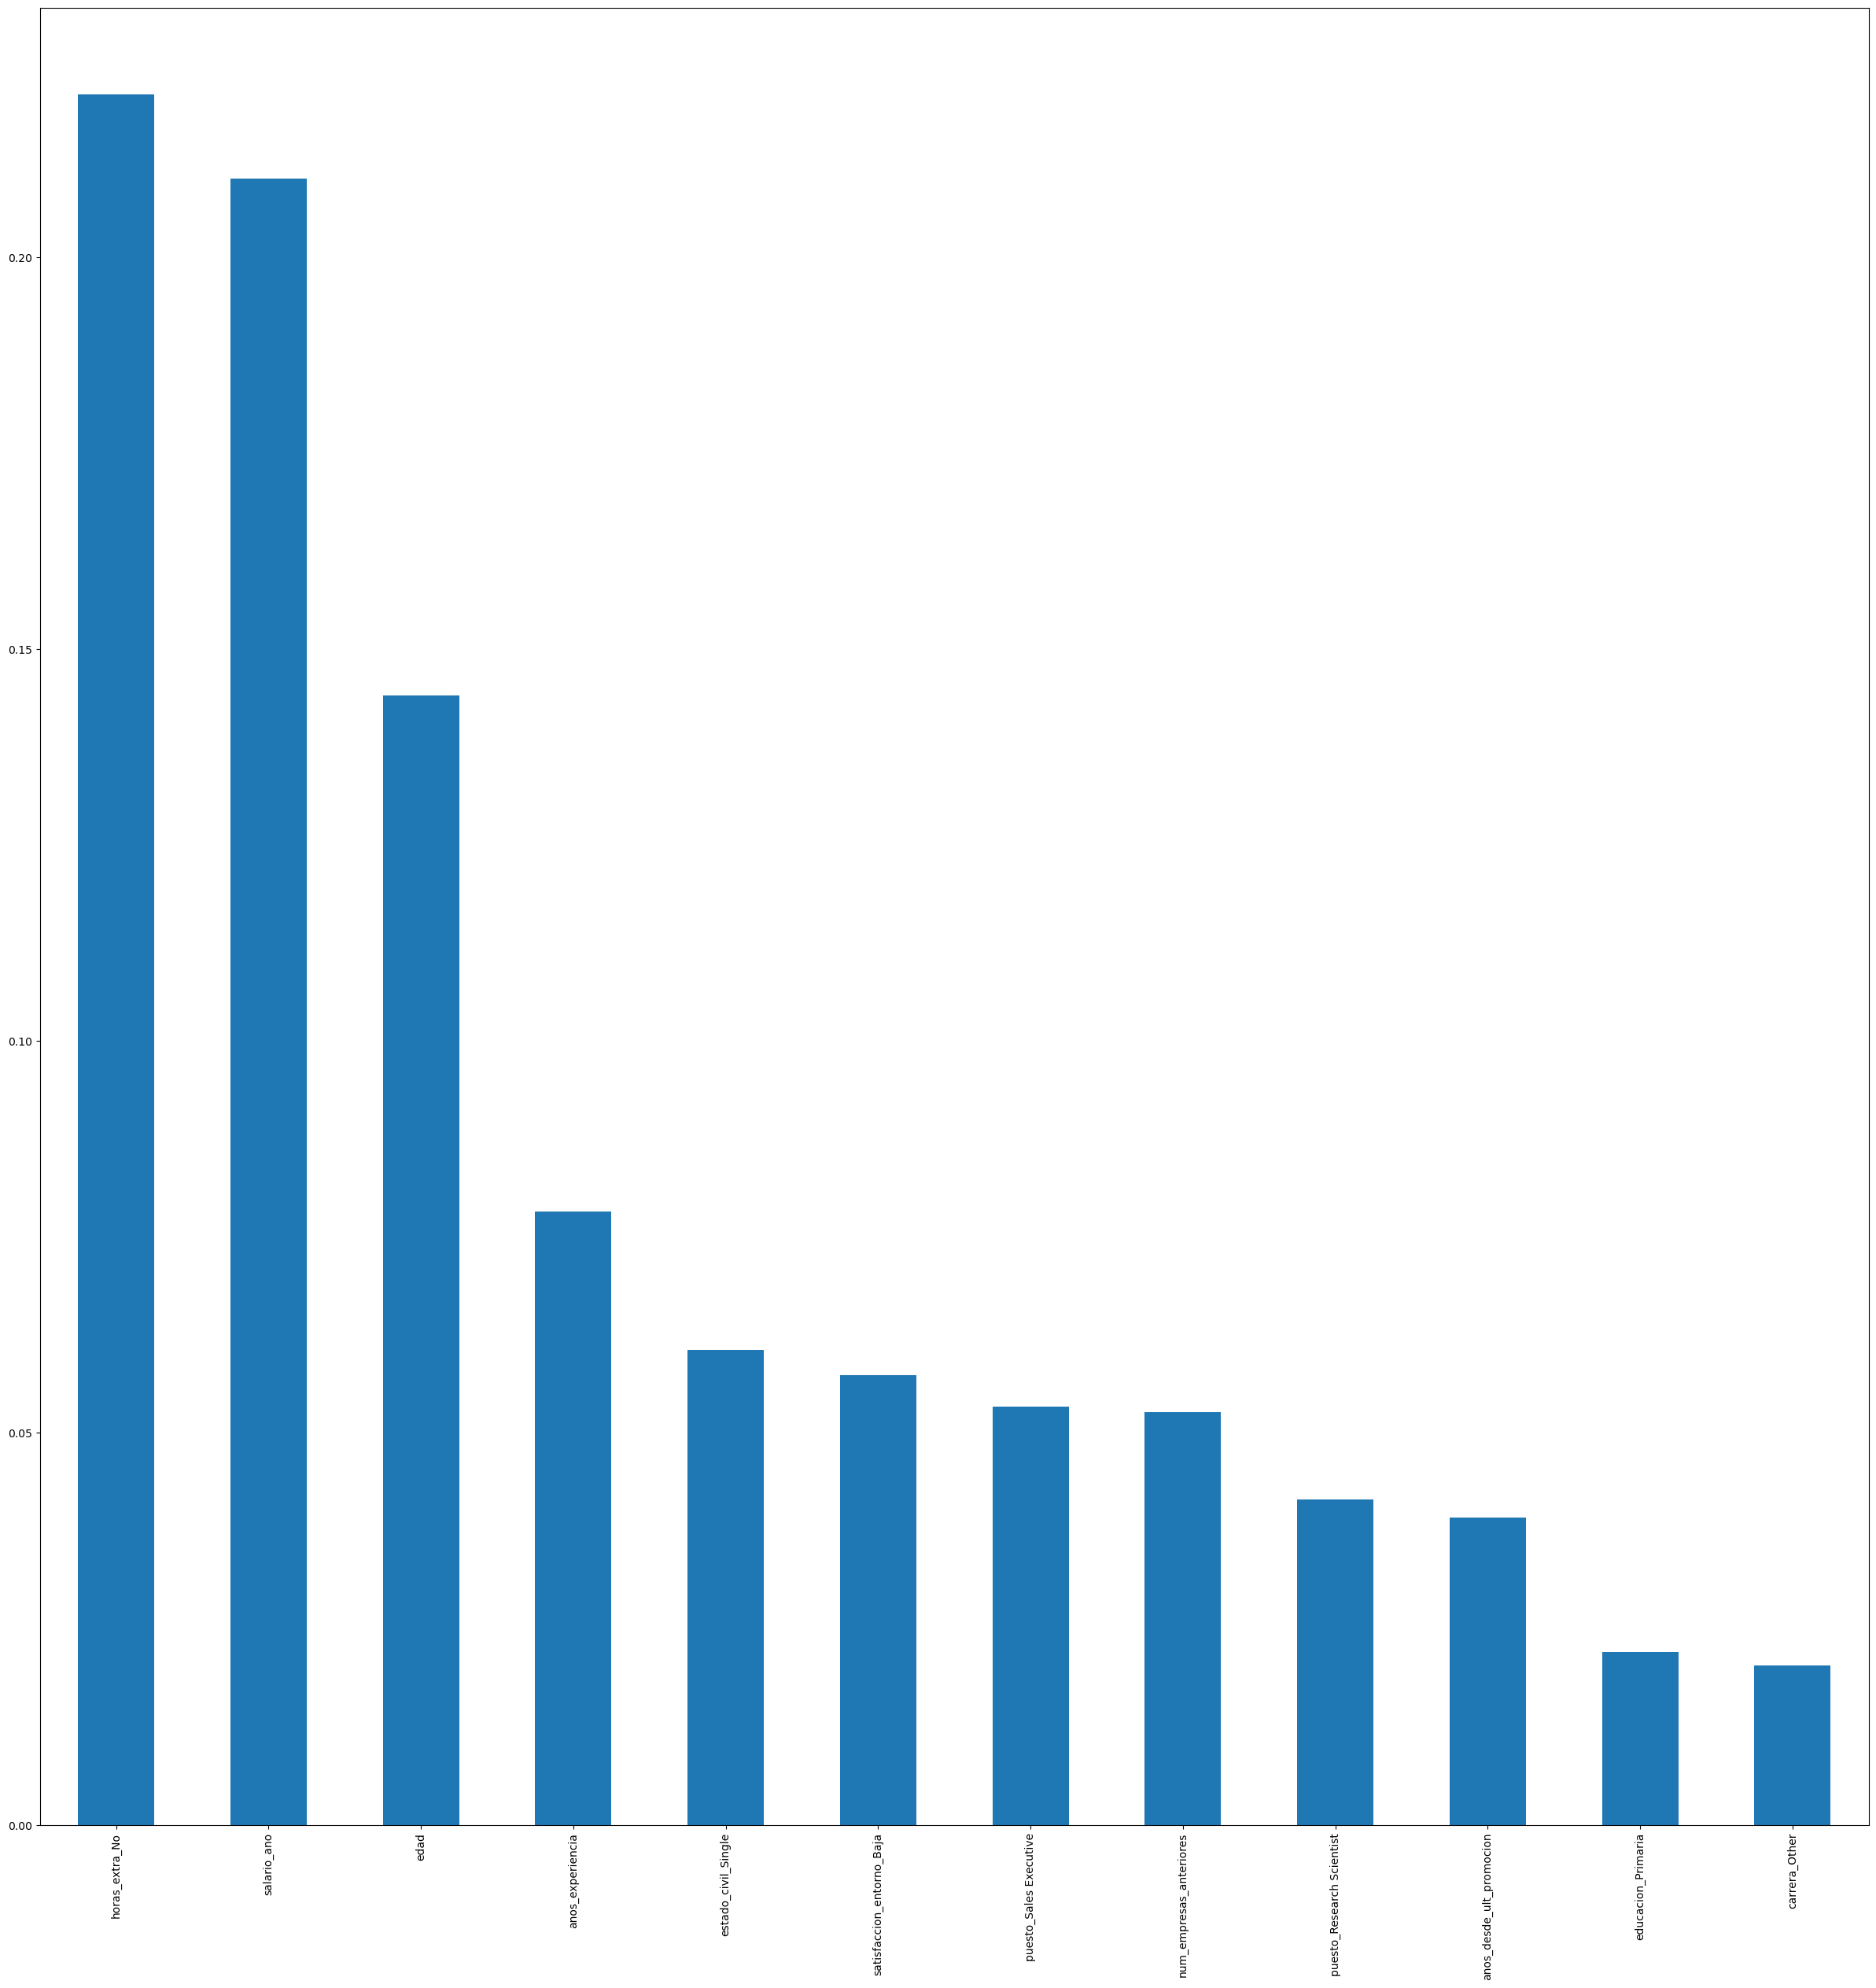

In [46]:
top_12 = pd.Series(dtc.feature_importances_, index = X_test.columns).sort_values(ascending=False)[:12]
top_12.plot(kind = 'bar', figsize = (30,30));

# 3. Deployment